In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


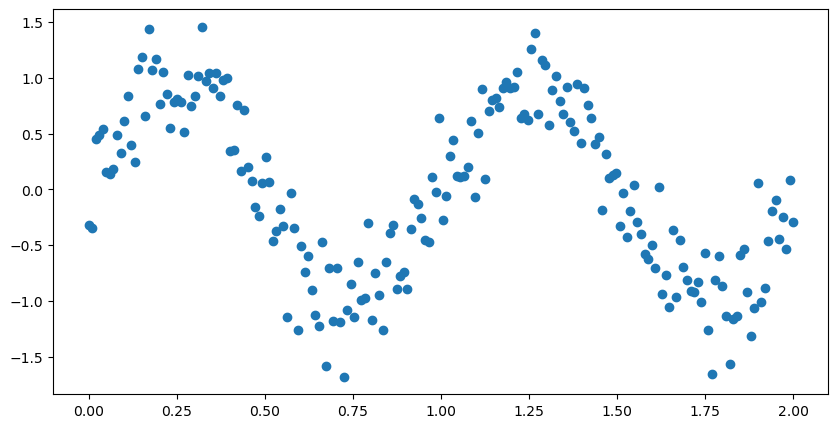

In [11]:
x = np.linspace(0,2,200)
y = np.sin(2*np.pi*x) + np.random.normal(0,0.3,len(x))
plt.figure(figsize=(10,5))
plt.scatter(x,y)

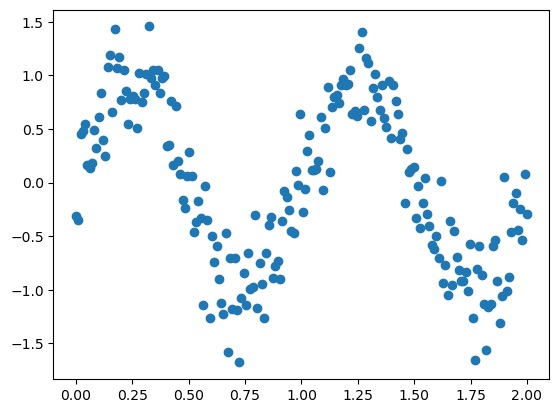

In [12]:
#x=np.linspace(0, 2, 300)
#x=x.reshape(-1,1)
#print(x.shape)
#y = np.sin(x) + np.random.normal(0, 0.3, len(x))

plt.figure()
plt.scatter(x,y,label='data')
x = x.reshape(-1,1)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
x = x.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7284596395615595

In [41]:
# ##### List possible hyperparameters #########
model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [48]:

parameters = {'max_depth':range(1,10)
              ,"criterion":['mse', 'friedman_mse', 'mae']
              , 'min_samples_split':range(2,10)
              , "splitter":['best', 'random']
              , 'min_samples_leaf':range(1,10)
              #,"min_impurity_decrease":[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
              }

GV = GridSearchCV(model, parameters, cv=3)
GV.fit(X_train, y_train)
print(GV.best_params_)
best_params_ = GV.best_params_
print(GV.best_score_)


/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_er

{'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}
0.7756768112124348


/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolut

/home/yuan.liu/miniconda3/envs/my_pymatgen/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


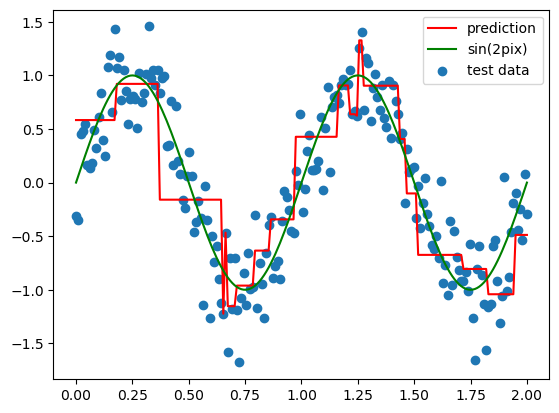

In [49]:
best_model = DecisionTreeRegressor(**best_params_)
best_model.fit(X_test, y_test)
best_model.score(X_test, y_test)

y_pred = best_model.predict(x)

plt.plot(x, y_pred, color='red', label='prediction')
plt.plot(x, np.sin(2*np.pi*x), color='green', label='sin(2pix)')
plt.scatter(x,y, label='test data')
plt.legend()
plt.show()

